In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, Adam
%matplotlib inline


In [3]:
# Useful Constants

# Output classes to learn how to classify
LABELS = [    
    "NORMAL",
    "SHOPLIFTING"
]
DATASET_PATH = r"H:\Sajal Video\Data\\"

x_train_path = DATASET_PATH + "X_train.csv"
#x_test_path = DATASET_PATH + "X_test.csv"
y_train_path = DATASET_PATH + "y_train.csv"
#y_test_path = DATASET_PATH + "y_test.csv"


n_steps = 32  # 32 frames per series, window size to look back

In [4]:
#load data, n_step size block at once
def load_X(path):
    data=pd.read_csv(path,header=None).values
    blocks = int(len(data) / n_steps)
    data=np.array(np.split(data,blocks))
    return data

def load_y(path):
    data=pd.read_csv(path,header=None).values
    return data-1

In [5]:
#Load the data
X_train = load_X(x_train_path)
#X_test = load_X(x_test_path)
y_train = load_y(y_train_path)
#y_test = load_y(y_test_path)

In [6]:
# Input Data 
training_data_count = len(X_train)  # number of training data
#test_data_count = len(X_test)  # number of test data
n_input = len(X_train[0][0])
n_hidden = 36 # Hidden layer num of features
n_classes = 2  #number of action classes

batch_size =64
print(training_data_count)
print(len(y_train)) 
print(y_train.shape)

264
264
(264, 1)


In [7]:
y_train_one_hot = to_categorical(y_train, num_classes=n_classes) #one hot encoding for softmax, if sigmoid was used, no need
#y_test_one_hot = to_categorical(y_test, n_classes)

In [8]:
# LSTM model
model = Sequential([
   # relu activation
   Dense(n_hidden, activation='relu'
   ),
   BatchNormalization(), 
   LSTM(n_hidden, return_sequences=True,  unit_forget_bias=1.0,dropout=0.2),
   LSTM(n_hidden,  unit_forget_bias=1.0),
   BatchNormalization(), 
   Dense(n_classes,
       activation='softmax'
   )
])

**Perform the LR range test** to find the min and max range of learning rates

In [9]:
# early stopping to prevent overfitting
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop=EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(monitor='loss',patience=2,verbose=1,factor=0.5,min_lr=0.00001)
callbacks=[earlystop,learning_rate_reduction]


In [10]:
model.compile(
   optimizer=Adam(),
   metrics=['accuracy'],
   loss='categorical_crossentropy'
)

In [11]:
history = model.fit(
   X_train, 
   y_train_one_hot, 
   epochs=150,
   batch_size=batch_size, validation_split=.2,callbacks=callbacks
)

Epoch 1/150
4/4 [==============================] - 5s 309ms/step - loss: 0.7471 - accuracy: 0.5829 - val_loss: 0.4213 - val_accuracy: 1.0000
Epoch 2/150
4/4 [==============================] - 0s 23ms/step - loss: 0.2119 - accuracy: 0.9384 - val_loss: 0.3768 - val_accuracy: 1.0000
Epoch 3/150
4/4 [==============================] - 0s 23ms/step - loss: 0.1248 - accuracy: 0.9763 - val_loss: 0.3264 - val_accuracy: 1.0000
Epoch 4/150
4/4 [==============================] - 0s 23ms/step - loss: 0.0813 - accuracy: 0.9905 - val_loss: 0.2826 - val_accuracy: 1.0000
Epoch 5/150
4/4 [==============================] - 0s 23ms/step - loss: 0.0490 - accuracy: 0.9905 - val_loss: 0.2492 - val_accuracy: 1.0000
Epoch 6/150
4/4 [==============================] - 0s 24ms/step - loss: 0.0256 - accuracy: 0.9953 - val_loss: 0.2276 - val_accuracy: 1.0000
Epoch 7/150
4/4 [==============================] - 0s 23ms/step - loss: 0.0284 - accuracy: 0.9953 - val_loss: 0.2162 - val_accuracy: 1.0000
Epoch 8/150
4/4 [==

In [12]:
model.save(r'H:\Sajal Video\Models\model.tf') #save the model for future prediction use

INFO:tensorflow:Assets written to: H:\Sajal Video\Models\model.tf\assets


INFO:tensorflow:Assets written to: H:\Sajal Video\Models\model.tf\assets


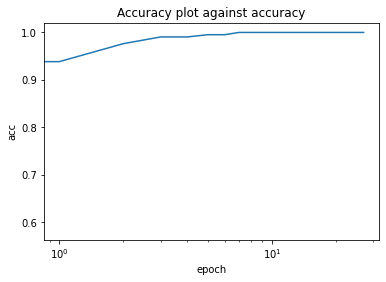

In [13]:
# plot accuracy curve
plt.plot(history.history['accuracy'])
plt.title('Accuracy plot against accuracy')
plt.xscale('log')
plt.xticks
plt.ylabel('acc')
plt.xlabel('epoch')
plt.show()

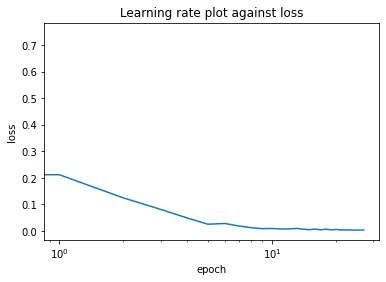

In [14]:
# plot loss curve
plt.plot(history.history['loss'])
plt.title('Learning rate plot against loss')
plt.xscale('log')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

By looking at the graph, the model starts converging when lr=0.02, so it is reasonable to set base lr = 0.02. Furthermore, above a learning rate of 0.09 the accuracy rise gets rough and eventually begins to drop so it is reasonable to set max lr = 0.09

In [15]:
#score=model.evaluate(X_test, y_test_one_hot, verbose=1)

In [16]:
#print(score)